## **MONTE CARLO SIMULATION OF APPLE STOCK**

## **1. Introduction**

Monte Carlo simulation a statistical method that is used to simulate and examine the behavior of intricate processes or systems that are affected by random variables. In order to simulate and forecast the potential outcomes of unknown occurrences, it is dependent on producing a large number of random samples. This approach is frequently used to evaluate the likelihood of alternative events and make defensible judgments in a variety of sectors, including science, engineering, finance, and risk management. Monte Carlo simulations help to explain the impact of risk and uncertainty in prediction and forecasting models.







## **2. Key components of Monte Carlo Simulation:**

**2.1 Random Sampling** - from probability distributions to simulate the behaviour of financial variables like asset return in this project.

**2.2 Repetation of trials**- involves repeatedly running the number of trials to simulate different outcomes and thus compute a probability distribution from the outcomes obtained.

**2.3 Stochastic Process**- involves randomly changing systems that evolve overtime, like the stock price.

**2.4 Expected outcome**-The results of each simulation are combined to provide a distribution of results, which is useful for estimating probabilities, possible losses, or the value of financial instruments in the face of uncertainty.




#**3. Stochastic models used in the Monte-Carlo Simulation**
There are various different stochastic processes used to derive the Monte-Carlo simulation. These models use random variables to represent uncertain components, allowing for the simulation of a wide range of possible outcomes based on predefined probability distributions. This section puts a light on both the all the processes that can be used for the simulation and discusses the model used in the project:

**3.1 Geometric Browninan Motion(GBM)**

This model is used to simuate stock prices in order to describe the stochastic behavior of prices. The GBM model assumes that the percentage change in stock prices follows a normal distribution. Therefore, it is based on the idea that stock prices have a continuous compound return that fluctuates randomly but grows overtime. These uncertain stock prices are used in the simulation to provide a wide range of possible outcomes. Ous project uses the GBM model for the simulation process.

**Formula:**

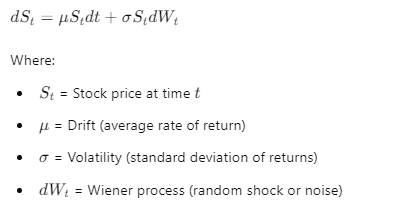



Other Stochastic processes used in Monte -Carlo Simulation,  based on the type of data used are:

**3.2 Mean-Reverting Models**

uses long-term means like Interest rates, commodities, exchange rates for the simulation process.

**3.3 Jump Diffusion Models**

This model takes into account assets with sudden price changes, such as stocks with potential market shocks.

**3.4 Heston Model:**

The Heston Model is often used to simulate the behavior of financial instruments with stochastic volatility, such as options.

**3.5 Cox-Ingersoll-Ross (CIR) Model**

 Interest rate paths for fixed income products and risk management are considered under ths CIR Model.

## **4. Steps to impletement Monte-Carlo Simulation**

**Step 1:Define the problem**

Identify the uncertain variables, in this scenario the stock price, and then identify the financial model to conduct the simulation to display the relationship between the variables.

**Step 2: Generate Random Inputs:**

For each trial, use a random input generator to randomly input values for each uncertain variable based on their probability distribution.

**Step 3: Run Simulations:**

Use the mode to simulate system's behaviour overtime. That is, run multiple simulations using the random samples as inputs. For each simulation, calculate the output of interest (e.g., financial returns, project completion time, etc.).

**Step 4: Repeat:**

Repeat the process to obtain multiple results and capture a wide range of possible outcomes.

**Step 5: Analyze results:**

Analyze the distribution of outcomes to extract key statistics like mean, variance, Value at Risk (VaR), or expected return, which assist in assesing the likelihood of various scenarios and measure portfolio risk.


## **5. Project Overview**

This project displays the simulation of Apple Inc. Stock price to help explain the impact of risk and uncertainty in prediction and forecasting the model. Since, Monte Carlo simulation takes the variable that has uncertainty and assigns it a random value, the uncertain variable in this scenario is the stock price that is volatile. Then the simulation model is run, and a result is provided. This process is repeated several times by assigning different random values to the uncertain variable( Stock Price).Once the simulation is complete, the results are averaged to arrive at an estimate.

We will apply the Geometric Brownian Motion (GBM):

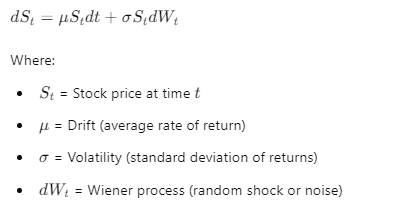

GBM models the price of a financial asset over time by incorporating two components: drift and volatility. The driftepresents the average expected return  of the asset, while the volatility captures the asset's risk or price variability.

## **6. Python Code: Monte-Carlo Simulation Implementation**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats

In [ ]:
plt.style.use("bmh")

def get_historical_data(symbol,start_date,end_date):
   # Get historical data from yahoo finance
    data = yf.download(symbol,start= start_date, end=end_date)

    return data

#Fetch historical data of daily price for Apple.Inc stock for five consequtive years starting from July 1, 2020 to June 30, 2024

AAPL=get_historical_data(symbol="AAPL",start_date="2019-01-01",end_date="2023-12-31")
AAPL_df=pd.DataFrame(AAPL)

AAPL_df.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.750080,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,33.989895,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.440910,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.362015,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.036129,164101200
2019-01-09,37.822498,38.632500,37.407501,38.327499,36.648087,180396400
2019-01-10,38.125000,38.492500,37.715000,38.450001,36.765221,143122800
2019-01-11,38.220001,38.424999,37.877499,38.072498,36.404251,108092800
2019-01-14,37.712502,37.817501,37.305000,37.500000,35.856853,129756800


**Step 1: Selecting the variable**

The data frame provides price information for Open, high, Low, close,Adj Close, and volume traded through the day. But in this project, Adjusted Close price of sotck is considered for the simulation. This is because adj close price modifies the closing price by reflecting the effects of corporate actions like dividens, stock splits, etc, providing a more accurate representation of the stock's actual value over time.

In [ ]:
# Select the Adj Close price as the uncertain veriable:
AAPL_Adj_Close=AAPL_df["Adj Close"]
AAPL_Adj_Close.head()

,Adj Close
Date,
2019-01-02,37.750080
2019-01-03,33.989895
2019-01-04,35.440910
2019-01-07,35.362015
2019-01-08,36.036129


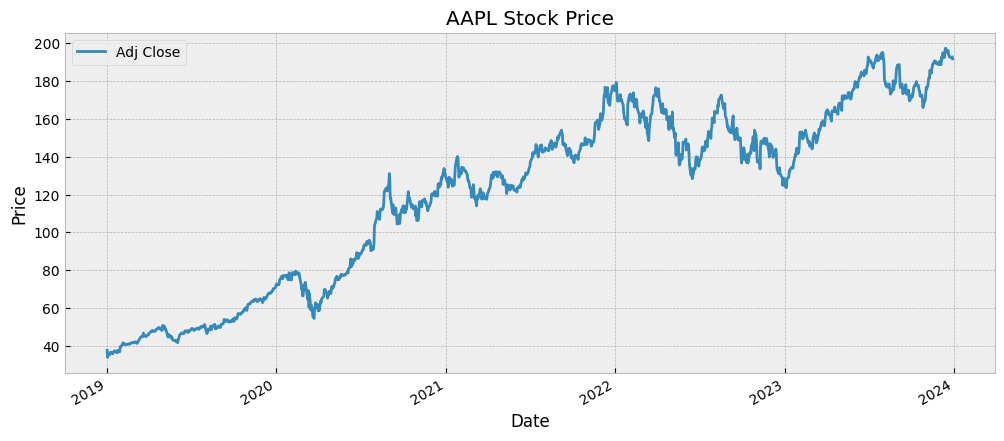

In [ ]:
# Visula Plotting of the AAPL stock and choosing only "Adj Close" column:

fig,ax=plt.subplots(figsize=(12,5))
AAPL_Adj_Close.plot(ax=ax)
plt.title("AAPL Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

**Figure 1: AAPLE Stock Price:** The plot displays the volatile and uncertain nature of the stock price over the five year period, which has increase significantly from 34 USD in  2019 to peaked to 197 USD by 2023.

In [ ]:
# Description of the

AAPL_Adj_Close.describe()

,Adj Close
count,1258.000000
mean,121.109184
std,46.641347
min,33.989895
25%,75.105940
50%,132.156410
75%,157.614883
max,197.361084


Date
2019-01-03   -0.099607
2019-01-04    0.042690
2019-01-07   -0.002226
2019-01-08    0.019063
2019-01-09    0.016982
2019-01-10    0.003196
2019-01-11   -0.009818
2019-01-14   -0.015037
2019-01-15    0.020466
2019-01-16    0.012216
Name: Adj Close, dtype: float64


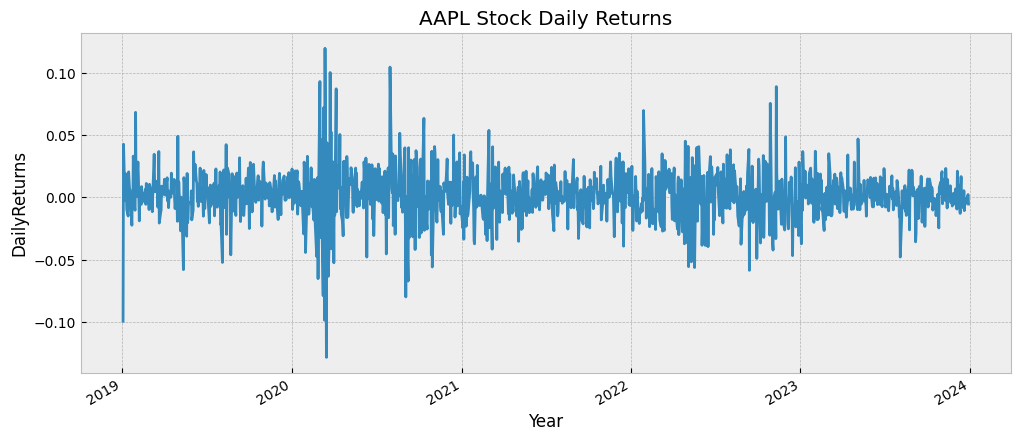

In [ ]:
#Calculate the daily returns using percentage change:

daily_returns = AAPL["Adj Close"].pct_change().dropna() # the daily returns are calculated by using the daily % change in closing price, dropping the null values
print(daily_returns.head(10))



fig,ax=plt.subplots(figsize=(12,5))
daily_returns.plot(ax=ax)
plt.title("AAPL Stock Daily Returns")
plt.xlabel("Year")
plt.ylabel("DailyReturns")
plt.grid(True)
plt.show()

**Figure 2: AAPL Stock Daily Returns:** The daily returns figure shows how much the stock price has increaded or decreased compared to the price of stock on the previous day. Hence ,it shows the daily volatility of the price of Apple Stocks, indicating market sentiment for that day.

The standard deviation of daily returns of AAPL Stock is: 0.02031


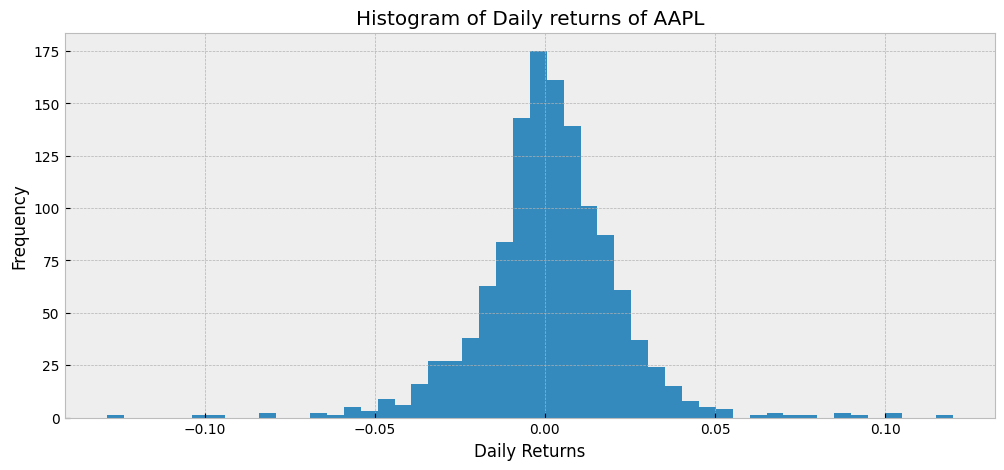

In [ ]:
#calculate the Standard Deviation of daily returns
std_dev=daily_returns.std()
print(f"The standard deviation of daily returns of AAPL Stock is:", round((std_dev),5))

# Plot histogram of AAPL and calculate the standard deviation
fig,ax=plt.subplots(figsize=(12,5))

# Histogram of daily closing price:
daily_returns.hist(ax=ax, bins=50)
plt.title("Histogram of Daily returns of AAPL")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()



**Figure 3:** The figure displays a histogram of the daily returns to assist in observing the frequency of different return values,that is, how many times each of the return values have occured over the period of five years. This helps to determine the pattern of the returns, which is bell shaped, resembling a normal distribution.  A histogram can reveal whether the distribution of returns is skewed:

Positive Skewness: A distribution with more small losses but a few large gains.

Negative Skewness: A distribution with more small gains but a few large losses.

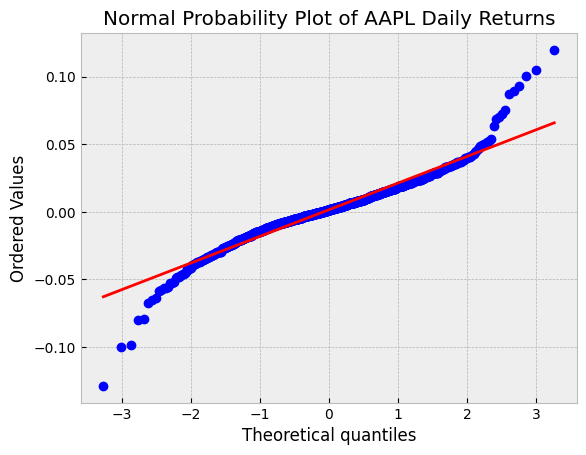

In [ ]:
#Calculating normal probabily:

Q= daily_returns #daily_returns=AAPL["Close"].pct_change().dropna()

#Create the Q-Q plot:
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot())
plt.title("Normal Probability Plot of AAPL Daily Returns")
plt.show()


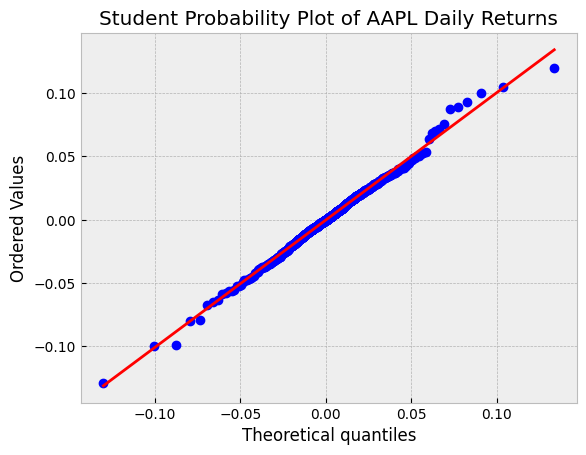

In [ ]:
# Calculate Student Probability Q-Q plot:

tdf,tmean, tsigma = scipy.stats.t.fit(Q)
scipy.stats.probplot(Q, dist=scipy.stats.t, sparams= (tdf,tmean,tsigma), plot=plt.subplot())
plt.title("Student Probability Plot of AAPL Daily Returns")
plt.show()

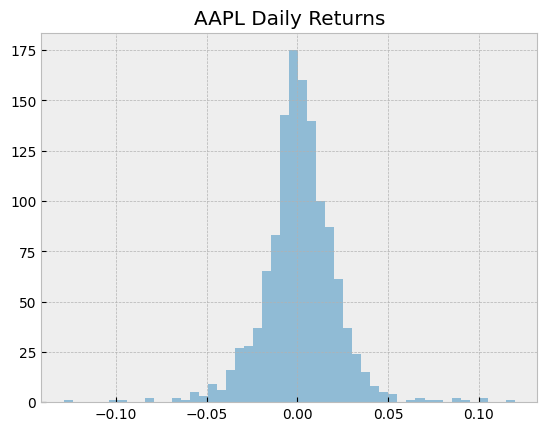

Mean: 0.001467550729008058
Sigma: 0.020311032562595126
T-Distribution Fit parameters: df= 3.62526534057549, mean=0.001695474095523451, sigma=0.013934099145011052


In [ ]:
#Take the empirical quantities from histogram:

daily_returns = AAPL["Close"].pct_change().dropna()

#Calculate mean and Standard Deviation:
mean= daily_returns.mean()
sigma = daily_returns.std()

#Plotting the histogram:
daily_returns.hist(bins= 50, histtype="stepfilled", alpha=0.5)
plt.title("AAPL Daily Returns")
plt.show()

#Print the statistical calculations:
print(f"Mean: {mean}")
print(f"Sigma: {sigma}")
print(f"T-Distribution Fit parameters: df= {tdf}, mean={tmean}, sigma={tsigma}")


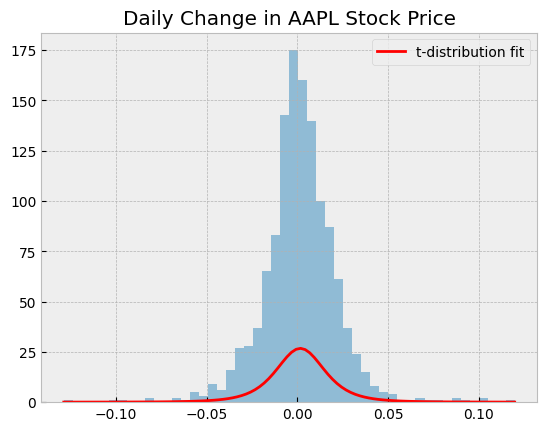

In [ ]:
#Plotting the PDF approximation of the empirical distribution:
import numpy as np
support= np.linspace(daily_returns.min(), daily_returns.max(),100)
daily_returns.hist(bins =50, histtype="stepfilled", alpha=0.5)


#Plot PDF of t-distribution:
plt.plot(support,scipy.stats.t.pdf(support, loc=tmean, scale=tsigma, df=tdf), "r-",label = "t-distribution fit")
plt.legend()
plt.title("Daily Change in AAPL Stock Price")
plt.show()

**Simulation of the Apple Stock Price:**

*Part 1: Input Parameters includes:*
1. Number of days the over which the simulation will run, which is 600 days.
2. The time increment for each step in the simulation, which is calculated a 1/ days, assuming 1 unit of time is divided into 600 steps (daily intervals).
3. Volatility represents the daily standard deviation of price changes (e.g., 1.415% daily volatility).
4. The average daily growth rate of the asset (0.0925% growth per day).
5.  The initial price of the asset at the beginning of the simulation, set to 200.

*Part 2: Using the random_walk() function:*

1. At first, a price array is initialized to store the simulated price for each day
2. Then a shock array is initialized to store random daily shock of price change
3. Then, the price at day 0 is set to the initial starting price (200 in this case)
4. A for loop a is set up:
      
*   At each step (i.e., for each day), the function generates a random price change (or shock) from a normal distribution with:
*   Mean: mu * dt (daily growth rate adjusted for the time step).
Standard deviation: sigma * np.sqrt(dt) (daily volatility adjusted for the time step).
The new price is updated based on the previous day's price, which ensures that the price does not go below 0.



*Part 3: Plotting the Random Walk:*
1. This part of the code generates 300 different random walks (simulated price paths) and plots them. Each random walk is produced by calling the random_walk() function.
2. plt.plot(random_walk(start_price)): This plots each simulated price path.
3. The result is a graph that shows the variety of price trajectories the asset could follow over the 600 days.

*Part 4: Simulating Final Price:*
1. Monte Carlo simulation: This part of the code runs the random_walk() function 10,000 times (for runs = 10000), simulating 10,000 possible price paths. For each simulation, it stores the price of the asset at the end of the 600-day period in the simulations array.
2. The final price after 600 days is extracted from the price array produced by random_walk() and stored in the simulations array.

*Part 5: Percentile Calculation:*

1. This line computes the 1st percentile of the final prices from the 10,000 simulations.
2. The np.percentile() function calculates the value below which a given percentage (in this case, 1%) of the data falls. This is often used to assess the Value at Risk (VaR) or to gauge how extreme the worst-case scenarios are.




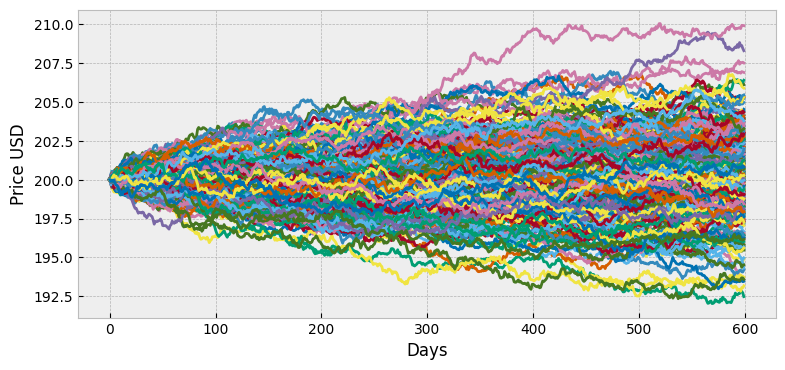

In [ ]:

#Input Parameters:
days = 600       #time horizon
dt= 1/ days
sigma = 0.014155395133010396    # volatility
mu = 0.0009254497840955332      # avg growth rate
start_price= 200

#Part 2: Using the random_walk() function:
def random_walk(start_price):
    price=np.zeros(days)   #Array to store simulated prices each day.
    shock=np.zeros(days)   # Array to store random shocks (daily price changes)
    price[0]=start_price   #Set the Intial price at the starting point

    for i in range(1,days):
        shock[i]=shock[i] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt)) #Random daily shock
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
         # The price at day 0 is set to the intial starting price at 200

    return price

#Part 3: Plotting the random walks:
plt.figure(figsize=(9, 4))
for run in range(300):
    plt.plot(random_walk(start_price)) #Set 300 random walks and plot each
plt.xlabel("Days")
plt.ylabel("Price USD")
plt.show()


# Part 4: Simulating final prices after 300 days:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(start_price)[days-1]


#Part 5: Percentile calculation:
q = np.percentile(simulations, 1)



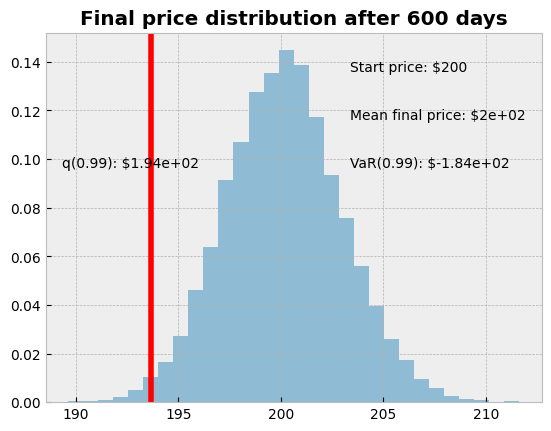

In [ ]:
# Plotting the histogram of final prices
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price: $200")
plt.figtext(0.6, 0.7, "Mean final price: ${:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): ${:.3}".format(10 - q))
plt.figtext(0.15, 0.6, "q(0.99): ${:.3}".format(q))
plt.axvline(x=q, linewidth=4, color="r")
plt.title("Final price distribution after {} days".format(days), weight="bold")
plt.show()